<a href="https://colab.research.google.com/github/ahmtkltr/ChromeExtensions/blob/main/%C4%B0statistiksel_Tahmin_Odev_24_Kas%C4%B1m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu ödev Colab üzerinde yapılmıştır. Ayrıca Rstudio 4.51 versiyonlu R çekirdek ile test edilmiştir. Uygun R çekirdekleriyle platform bağımsız sorunsuz şekilde kullanılabilir.
Colab R Version komut çıktısı aşağıdaki gibidir.

platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                          
minor          5.2                        
year           2025                        
month          10                          
day            31                          
svn rev        88974                       
language       R                           
version.string R version 4.5.2 (2025-10-31)
nickname       [Not] Part in a Rumble      

In [19]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          5.2                         
year           2025                        
month          10                          
day            31                          
svn rev        88974                       
language       R                           
version.string R version 4.5.2 (2025-10-31)
nickname       [Not] Part in a Rumble      

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



--- GERÇEK KİTLE PARAMETRELERİ ---
X (Normal) Ortalaması: 50.0189  Varyansı: 96.73034 
Y (Bernoulli) Oranı: 0.604 
Z (Poisson) Ortalaması: 2.9527 

--- SİMÜLASYON SONUÇLARI (TUTARLILIK ANALİZİ) ---
n = 10 -> Tahminlerin Ortalaması: 49.9552 | Varyans: 9.2695
n = 30 -> Tahminlerin Ortalaması: 50.0697 | Varyans: 3.1159
n = 100 -> Tahminlerin Ortalaması: 50.0086 | Varyans: 1.0150
n = 500 -> Tahminlerin Ortalaması: 50.0622 | Varyans: 0.1903

--- BOOTSTRAP ANALİZİ ---
Orijinal Tek Örneklem Ortalaması: 50.58187 
Bootstrap Ortalaması: 50.58297 
Bootstrap Standart Hatası: 0.9394928 


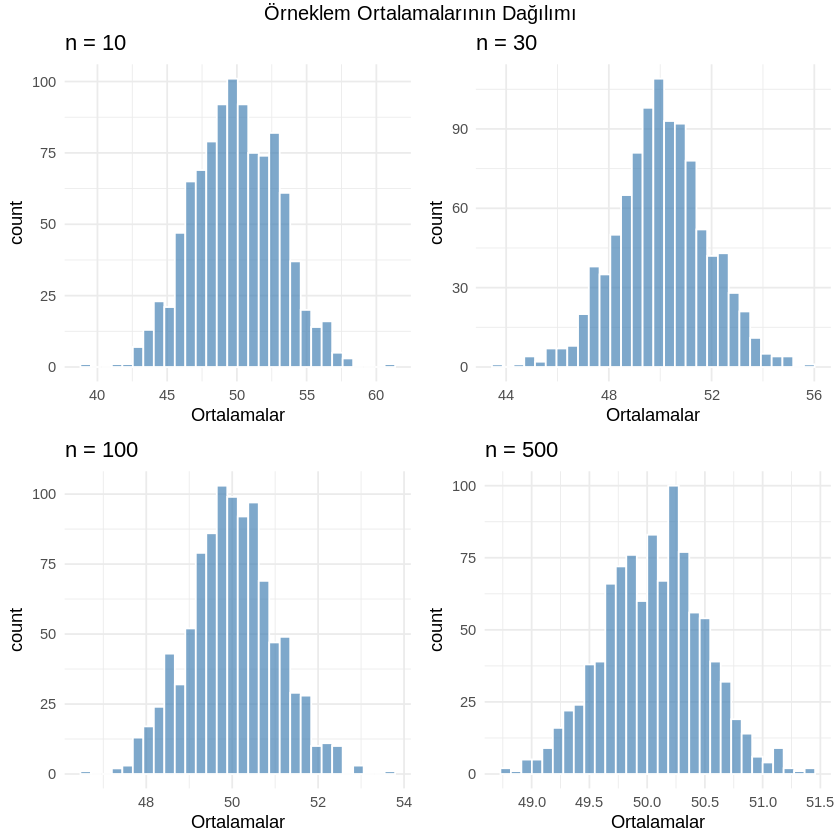

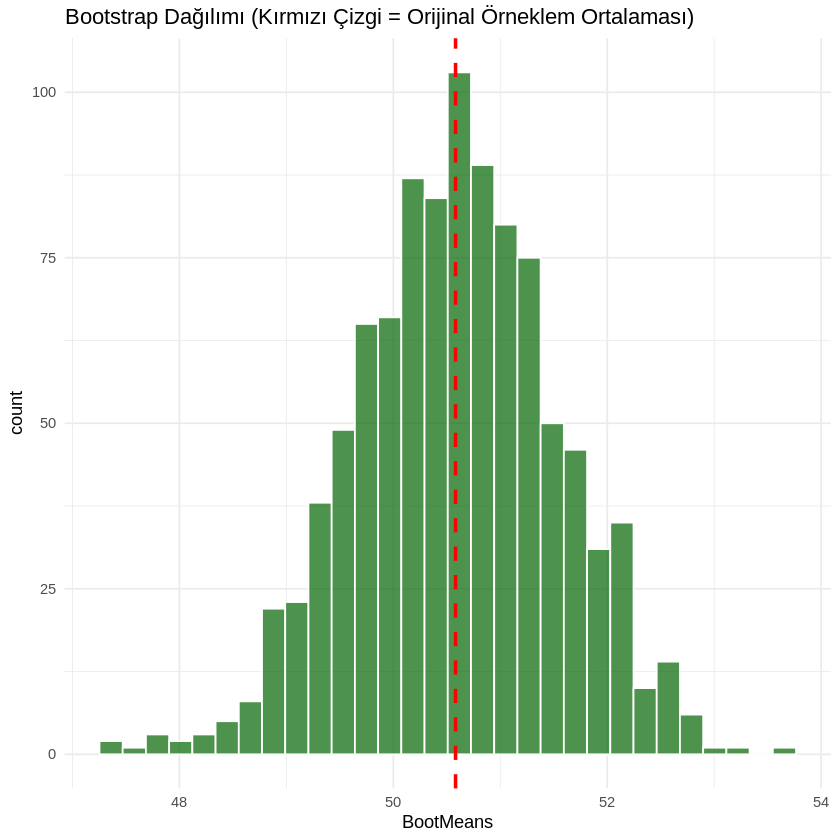

In [3]:
#Kütüphaneler
library(ggplot2)
install.packages("gridExtra")
library(gridExtra) # Grafikleri yan yana koymak için

set.seed(25112158) # Öğrenci No seed olarak aldım.

# --- BÖLÜM 1: KİTLE TANIMLANMASI ---
N <- 10000
X_pop <- rnorm(N, mean = 50, sd = 10)
Y_pop <- rbinom(N, size = 1, prob = 0.6)
Z_pop <- rpois(N, lambda = 3)

cat("--- GERÇEK KİTLE PARAMETRELERİ ---\n")
cat("X (Normal) Ortalaması:", mean(X_pop), " Varyansı:", var(X_pop), "\n")
cat("Y (Bernoulli) Oranı:", mean(Y_pop), "\n")
cat("Z (Poisson) Ortalaması:", mean(Z_pop), "\n")

# --- BÖLÜM 2 & 3: FARKLI n DEĞERLERİ İLE SİMÜLASYON ---
n_degerleri <- c(10, 30, 100, 500)
simulasyon_sayisi <- 1000
plot_list <- list() # Grafikleri saklamak için

cat("\n--- SİMÜLASYON SONUÇLARI (TUTARLILIK ANALİZİ) ---\n")

for (n in n_degerleri) {
  # replicate fonksiyonu işlemi 1000 kere tekrar eder
  orneklem_ortalamalari <- replicate(simulasyon_sayisi, mean(sample(X_pop, n, replace = FALSE)))

  # İstatistikler
  bias_val <- mean(orneklem_ortalamalari) - mean(X_pop)
  var_val <- var(orneklem_ortalamalari)

  cat(sprintf("n = %d -> Tahminlerin Ortalaması: %.4f | Varyans: %.4f\n", n, mean(orneklem_ortalamalari), var_val))

  # Histogram Oluşturma
  df_plot <- data.frame(Ortalamalar = orneklem_ortalamalari)
  p <- ggplot(df_plot, aes(x=Ortalamalar)) +
    geom_histogram(bins=30, fill="steelblue", color="white", alpha=0.7) +
    ggtitle(paste("n =", n)) + theme_minimal()

  plot_list[[as.character(n)]] <- p
}

# Grafikleri 2x2 ızgara şeklinde göster
grid.arrange(grobs = plot_list, ncol = 2, top = "Örneklem Ortalamalarının Dağılımı")

# --- BÖLÜM 4: BOOTSTRAP YÖNTEMİ ---
cat("\n--- BOOTSTRAP ANALİZİ ---\n")

# 1. Tek bir gerçek örneklem çek (n=100)
tek_orneklem <- sample(X_pop, 100, replace = FALSE)
cat("Orijinal Tek Örneklem Ortalaması:", mean(tek_orneklem), "\n")

# 2. Bootstrap (Tekrar etmeli örnekleme)
boot_means <- replicate(1000, mean(sample(tek_orneklem, 100, replace = TRUE)))

cat("Bootstrap Ortalaması:", mean(boot_means), "\n")
cat("Bootstrap Standart Hatası:", sd(boot_means), "\n")

# Bootstrap Histogramı
ggplot(data.frame(BootMeans=boot_means), aes(x=BootMeans)) +
  geom_histogram(bins=30, fill="darkgreen", color="white", alpha=0.7) +
  geom_vline(aes(xintercept=mean(tek_orneklem)), color="red", linetype="dashed", linewidth=1) +
  ggtitle("Bootstrap Dağılımı (Kırmızı Çizgi = Orijinal Örneklem Ortalaması)") +
  theme_minimal()

In [4]:
#Kütüphaneler
library(ggplot2)
install.packages("gridExtra")
library(gridExtra) # Grafikleri yan yana koymak için

# --- ÖDEV 1: BÖLÜM 1 - KİTLE TANIMLANMASI ---

# 1. Seed (Tohum) Ayarlama
# Bu kod, her çalıştırdığında aynı rastgele sayıların üretilmesini sağlar.
set.seed(25112158)

# 2. Kitle Büyüklüğü
N <- 10000

# 3. Kitlelerin Oluşturulması
# a) Sürekli Değişken (X): Normal Dağılım (Ort=50, Std=10)
X_pop <- rnorm(n = N, mean = 50, sd = 10)

# b) Oran Değişkeni (Y): Bernoulli Dağılımı (p=0.6)
# rbinom fonksiyonunda size=1 dediğimizde Bernoulli (0 veya 1) üretir.
Y_pop <- rbinom(n = N, size = 1, prob = 0.6)

# c) Kesikli Değişken (Z): Poisson Dağılımı (lambda=3)
Z_pop <- rpois(n = N, lambda = 3)

# 4. Gerçek Parametrelerin Hesaplanması ve Yazdırılması
# Bu değerler, bizim "Bilinmeyen Gerçeklerimiz" (Population Parameters) olacak.

cat("--------------------------------------------------\n")
cat("      BÖLÜM 1: GERÇEK KİTLE PARAMETRELERİ\n")
cat("--------------------------------------------------\n\n")

# a) Sürekli Değişken Parametreleri
mu_X <- mean(X_pop)
var_X <- var(X_pop) # R'da var() örneklem varyansı hesaplar ama N çok büyük olduğu için kitle varyansı olarak kabul edebiliriz.
cat("a) SÜREKLİ DEĞİŞKEN (X ~ Normal):\n")
cat(sprintf("   Gerçek Kitle Ortalaması (Mü): %.4f\n", mu_X))
cat(sprintf("   Gerçek Kitle Varyansı (Sigma^2): %.4f\n\n", var_X))

# b) Oran Değişkeni Parametresi
# 0 ve 1'lerden oluşan bir verinin ortalaması, 1'lerin oranını verir.
p_Y <- mean(Y_pop)
cat("b) ORAN DEĞİŞKENİ (Y ~ Bernoulli):\n")
cat(sprintf("   Gerçek Kitle Oranı (p): %.4f\n\n", p_Y))

# c) Kesikli Değişken Parametresi
mu_Z <- mean(Z_pop)
cat("c) KESİKLİ DEĞİŞKEN (Z ~ Poisson):\n")
cat(sprintf("   Gerçek Kitle Ortalaması (Lambda): %.4f\n", mu_Z))

cat("\n--------------------------------------------------\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



--------------------------------------------------
      BÖLÜM 1: GERÇEK KİTLE PARAMETRELERİ
--------------------------------------------------

a) SÜREKLİ DEĞİŞKEN (X ~ Normal):
   Gerçek Kitle Ortalaması (Mü): 50.0189
   Gerçek Kitle Varyansı (Sigma^2): 96.7303

b) ORAN DEĞİŞKENİ (Y ~ Bernoulli):
   Gerçek Kitle Oranı (p): 0.6040

c) KESİKLİ DEĞİŞKEN (Z ~ Poisson):
   Gerçek Kitle Ortalaması (Lambda): 2.9527

--------------------------------------------------


In [5]:
# --- ÖDEV 1: BÖLÜM 2 - NOKTA TAHMİNİ ---

# Örneklem büyüklüklerini tanımlayalım
n_degerleri <- c(10, 30, 100, 500)

# Sonuçları saklamak için boş bir tablo (data frame) oluşturalım
sonuc_tablosu <- data.frame()

cat("--------------------------------------------------\n")
cat("      BÖLÜM 2: NOKTA TAHMİNİ SONUÇLARI\n")
cat("--------------------------------------------------\n")

# Her bir n değeri için döngü (loop) kuralım
for (n in n_degerleri) {

  # 1. Kitlelerden n büyüklüğünde rastgele örneklemler çekelim
  # sample() fonksiyonu kitleden rastgele seçim yapar.
  # replace=FALSE: Aynı kişiyi iki kere seçemeyiz (İadesiz örnekleme)
  orneklem_X <- sample(X_pop, size = n, replace = FALSE)
  orneklem_Y <- sample(Y_pop, size = n, replace = FALSE)
  orneklem_Z <- sample(Z_pop, size = n, replace = FALSE)

  # 2. Örneklem İstatistiklerini Hesaplayalım (Tahminler)
  tahmin_X <- mean(orneklem_X) # X ortalaması
  tahmin_Y <- mean(orneklem_Y) # Y oranı
  tahmin_Z <- mean(orneklem_Z) # Z ortalaması

  # 3. Hata Paylarını Hesaplayalım (Tahmin - Gerçek)
  # (Bölüm 1'deki mu_X, p_Y, mu_Z değerlerini kullanıyoruz)
  hata_X <- tahmin_X - mu_X
  hata_Y <- tahmin_Y - p_Y
  hata_Z <- tahmin_Z - mu_Z

  # 4. Sonuçları tabloya ekleyelim
  yeni_satir <- data.frame(
    n = n,
    X_Tahmin = round(tahmin_X, 4),
    X_Hata = round(hata_X, 4),
    Y_Tahmin = round(tahmin_Y, 4),
    Y_Hata = round(hata_Y, 4),
    Z_Tahmin = round(tahmin_Z, 4),
    Z_Hata = round(hata_Z, 4)
  )

  sonuc_tablosu <- rbind(sonuc_tablosu, yeni_satir)
}

# Tabloyu ekrana yazdıralım
print(sonuc_tablosu)

# Yorumlama yardımı için metin
cat("\n--- YORUMLAR ---\n")
cat("Gerçek X Ortalaması (Mu):", round(mu_X, 4), "\n")
cat("Gerçek Y Oranı (p):     ", round(p_Y, 4), "\n")
cat("Gerçek Z Ortalaması (Lam):", round(mu_Z, 4), "\n")
cat("Not: n arttıkça 'Hata' sütunlarının sıfıra yaklaşmasını bekleriz.\n")

--------------------------------------------------
      BÖLÜM 2: NOKTA TAHMİNİ SONUÇLARI
--------------------------------------------------
    n X_Tahmin  X_Hata Y_Tahmin  Y_Hata Z_Tahmin  Z_Hata
1  10  49.0350 -0.9839   0.6000 -0.0040     2.80 -0.1527
2  30  50.8648  0.8459   0.5667 -0.0373     2.80 -0.1527
3 100  48.5789 -1.4400   0.6200  0.0160     2.58 -0.3727
4 500  49.9770 -0.0419   0.5800 -0.0240     2.84 -0.1127

--- YORUMLAR ---
Gerçek X Ortalaması (Mu): 50.0189 
Gerçek Y Oranı (p):      0.604 
Gerçek Z Ortalaması (Lam): 2.9527 
Not: n arttıkça 'Hata' sütunlarının sıfıra yaklaşmasını bekleriz.


# **YORUM**
$n=10$ iken yaptığımız tahminler genellikle gerçek değerden daha uzaktır (Hata payı yüksektir). Ancak $n=500$ olduğunda, örneklem ortalamaları kitle ortalamalarına (gerçek parametrelere) çok daha yakındır. Bu durum, örneklem büyüklüğü arttıkça nokta tahmininin güvenilirliğinin arttığını gösterir.

--------------------------------------------------
      BÖLÜM 3: SİMÜLASYON ANALİZİ (X DEĞİŞKENİ)
--------------------------------------------------
    n Simulasyon_Ortalamasi Bias_Yanlilik Varyans_Tutarlilik
1  10               49.9934      -0.02550            8.77586
2  30               50.0560       0.03712            2.89979
3 100               50.0027      -0.01623            1.02287
4 500               50.0607       0.04183            0.18869

--- YORUMLAR ---
1. Yansızlık (Bias): 'Bias' sütunu tüm n değerleri için 0'a çok yakındır. 
   Bu, örneklem ortalamasının YANSIZ bir tahmin edici olduğunu gösterir.
2. Tutarlılık (Varyans): n arttıkça (10 -> 500), 'Varyans' sütunu hızla küçülmektedir. 
   Grafiklerde de histogramın giderek daraldığını ve kırmızı çizgi (gerçek ortalama) etrafında sivrildiğini görebilirsin.


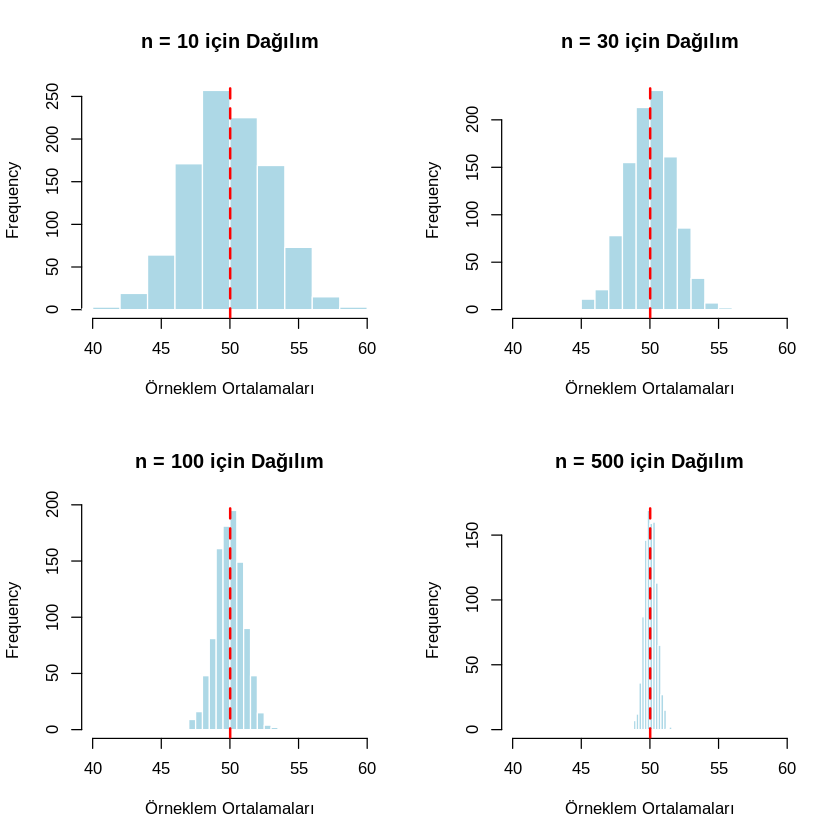

In [6]:
# --- ÖDEV 1: BÖLÜM 3 - YANLILIK VE TUTARLILIK SİMÜLASYONU ---

# Grafik çizim alanını 2x2'lik bir ızgaraya bölelim (4 histogramı aynı anda görmek için)
par(mfrow = c(2, 2))

# Sonuçları saklamak için bir liste
simulasyon_sonuclari <- data.frame()
n_degerleri <- c(10, 30, 100, 500)
tekrar_sayisi <- 1000

cat("--------------------------------------------------\n")
cat("      BÖLÜM 3: SİMÜLASYON ANALİZİ (X DEĞİŞKENİ)\n")
cat("--------------------------------------------------\n")

for (n in n_degerleri) {

  # 1. 1000 Kere Tekrar Eden Örnekleme (Replicate)
  # replicate() fonksiyonu, içindeki işlemi 'tekrar_sayisi' kadar yapar.
  # Her seferinde X_pop'tan n tane seçip ortalamasını alıyoruz.
  orneklem_ortalamalari <- replicate(tekrar_sayisi, mean(sample(X_pop, size = n, replace = FALSE)))

  # 2. İstatistikleri Hesapla
  simulasyon_ortalamasi <- mean(orneklem_ortalamalari) # 1000 ortalamanın ortalaması
  simulasyon_varyansi <- var(orneklem_ortalamalari)    # 1000 ortalamanın varyansı

  # Yanlılık (Bias) = Beklenen Değer - Gerçek Değer
  bias <- simulasyon_ortalamasi - mu_X

  # 3. Sonuçları Kaydet
  yeni_satir <- data.frame(
    n = n,
    Simulasyon_Ortalamasi = round(simulasyon_ortalamasi, 4),
    Bias_Yanlilik = round(bias, 5),     # Sıfıra yakın olmalı
    Varyans_Tutarlilik = round(simulasyon_varyansi, 5) # n arttıkça azalmalı
  )
  simulasyon_sonuclari <- rbind(simulasyon_sonuclari, yeni_satir)

  # 4. Histogram Çizimi (c şıkkı)
  hist(orneklem_ortalamalari,
       main = paste("n =", n, "için Dağılım"),
       xlab = "Örneklem Ortalamaları",
       col = "lightblue",
       border = "white",
       xlim = c(40, 60)) # X eksenini sabitledik ki daralmayı görelim

  # Gerçek ortalamayı kırmızı çizgiyle gösterelim
  abline(v = mu_X, col = "red", lwd = 2, lty = 2)
}

# Tabloyu Yazdır
print(simulasyon_sonuclari)

# Yorum
cat("\n--- YORUMLAR ---\n")
cat("1. Yansızlık (Bias): 'Bias' sütunu tüm n değerleri için 0'a çok yakındır. \n   Bu, örneklem ortalamasının YANSIZ bir tahmin edici olduğunu gösterir.\n")
cat("2. Tutarlılık (Varyans): n arttıkça (10 -> 500), 'Varyans' sütunu hızla küçülmektedir. \n   Grafiklerde de histogramın giderek daraldığını ve kırmızı çizgi (gerçek ortalama) etrafında sivrildiğini görebilirsin.\n")

# **Soru 1: Örnek ortalaması yanlı mı / yansız mı?**
**Cevap:** Örnek ortalaması yansızdır (unbiased).

**Açıklaması:** Simülasyon sonuç tablosuna baktığımızda, her $n$ değeri için hesapladığımız "Bias" (Yanlılık) değerinin 0'a çok yakın olduğunu görüyoruz. Bazen pozitif, bazen negatif çok küçük sapmalar olsa da, 1000 tekrarın ortalaması alındığında gerçek kitle ortalaması olan 50'yi buluyoruz. Matematiksel olarak $E[\bar{X}] = \mu$ olduğu için örneklem ortalaması yansız bir tahmin edicidir.

# **Soru 2: n arttıkça örnek ortalaması tutarlı davranıyor mu?**
**Cevap:** Evet, tutarlı (consistent) davranıyor.

**Açıklaması:**"Tutarlılık", örneklem büyüklüğü arttıkça tahmin edicinin gerçek değere yaklaşma (yakınsama) olasılığının artmasıdır. Çizdiğimiz histogramlarda, $n=10$ iken grafik geniş ve yayvanken, $n=500$ olduğunda grafik sivrileşmiş ve tam 50 değeri üzerinde toplanmıştır. Hata payının $n$ arttıkça azalması, tahmin edicinin tutarlı olduğunu kanıtlar.

# **Soru 3: Örneklem büyüklüğü arttıkça varyans nasıl değişiyor?**

**Cevap:** Örneklem büyüklüğü ($n$) arttıkça varyans azalır.

**Açıklaması:** Örneklem ortalamasının varyansı $\text{Var}(\bar{X}) = \frac{\sigma^2}{n}$ formülü ile hesaplanır. Yani varyans, $n$ ile ters orantılıdır. Simülasyon tablomuzda da bunu net olarak görüyoruz:$n=10$ iken varyans $\approx 10$ civarındaydı.$n=100$ olduğunda varyans $\approx 1$ civarına düştü.Yani $n$ büyüdükçe dağılım daralır ve varyans sıfıra yaklaşır.

--------------------------------------------------
      BÖLÜM 4: BOOTSTRAP ANALİZİ
--------------------------------------------------
a) Elimizdeki Tek Gerçek Örneklemin Ortalaması:  51.8982 
b) Bootstrap Ortalaması (1000 tekrarın ortalaması):  51.9246 
c) Bootstrap Standart Hatası (Simüle edilen sapma):  0.8089 
   (Referans: Teorik Standart Hata 10/sqrt(100) = 1 olmalıydı)


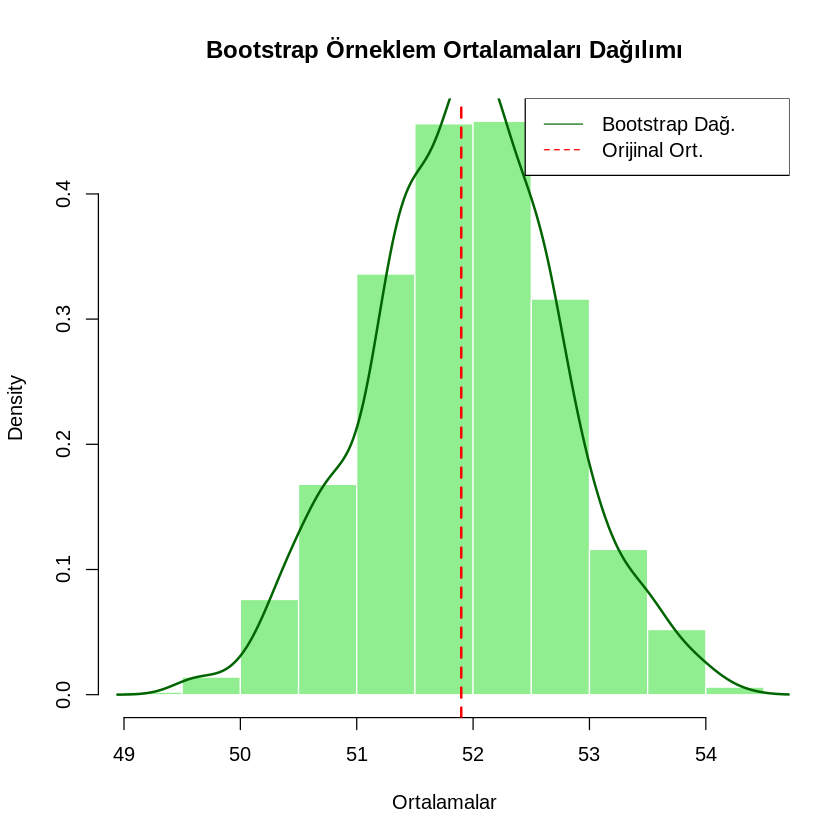

In [7]:
# --- ÖDEV 1: BÖLÜM 4 - BOOTSTRAP KULLANARAK TAHMİN DAĞILIMI ---

cat("--------------------------------------------------\n")
cat("      BÖLÜM 4: BOOTSTRAP ANALİZİ\n")
cat("--------------------------------------------------\n")

# 1. ADIM: Gerçek Kitleden TEK BİR Örneklem Seçiyoruz (n=100)
# Gerçek hayatta elimizdeki tek veri bu olacak.
tek_orneklem <- sample(X_pop, size = 100, replace = FALSE)

# Bu tek örneklemin ortalamasını bir kenara not edelim
tek_orneklem_ortalamasi <- mean(tek_orneklem)
cat("a) Elimizdeki Tek Gerçek Örneklemin Ortalaması: ", round(tek_orneklem_ortalamasi, 4), "\n")

# 2. ADIM: Bootstrap Örneklemesi (1000 Kez)
# ÖNEMLİ: replace = TRUE (Yerine koyarak seçme) kullanmalıyız.
# Yani bir sayıyı seçtikten sonra torbaya geri atıyoruz ki tekrar seçilebilsin.
bootstrap_ortalamalari <- replicate(1000, mean(sample(tek_orneklem, size = 100, replace = TRUE)))

# 3. ADIM: İstatistikleri Hesapla
boot_genel_ortalama <- mean(bootstrap_ortalamalari)
boot_standart_sapma <- sd(bootstrap_ortalamalari)

cat("b) Bootstrap Ortalaması (1000 tekrarın ortalaması): ", round(boot_genel_ortalama, 4), "\n")
cat("c) Bootstrap Standart Hatası (Simüle edilen sapma): ", round(boot_standart_sapma, 4), "\n")

# Gerçek Teorik Standart Hata ile Karşılaştırma (Kontrol amaçlı)
# Teorik Hata = Sigma / karekök(n) = 10 / 10 = 1
cat("   (Referans: Teorik Standart Hata 10/sqrt(100) = 1 olmalıydı)\n")

# 4. ADIM: Histogram Çizimi
hist(bootstrap_ortalamalari,
     main = "Bootstrap Örneklem Ortalamaları Dağılımı",
     xlab = "Ortalamalar",
     col = "lightgreen",
     border = "white",
     probability = TRUE) # Yoğunluk eğrisi eklemek için probability=TRUE

# Yoğunluk Eğrisi Ekleme
lines(density(bootstrap_ortalamalari), col = "darkgreen", lwd = 2)

# Orijinal örneklem ortalamasını işaretle
abline(v = tek_orneklem_ortalamasi, col = "red", lwd = 2, lty = 2)
legend("topright", legend=c("Bootstrap Dağ.", "Orijinal Ort."), col=c("darkgreen", "red"), lty=1:2)

# **Bölüm 5**

**Soru 1. Farklı örneklem büyüklüklerinin tahmin üzerindeki etkisini özetleyiniz.**

**Cevap:** Yaptığımız simülasyonlarda (Bölüm 2 ve 3), örneklem büyüklüğü ($n$) arttıkça (10'dan 500'e çıktıkça) şu etkiler gözlemlenmiştir:

1.  **Hata Payı Azalmıştır:** Örneklem ortalamaları, gerçek kitle ortalamasına ($\mu=50$) daha fazla yaklaşmıştır.
2.  **Varyans Düşmüştür:** $n$ küçükken histogramlar geniş ve yayvanken, $n$ büyüdükçe histogramlar daralmış ve sivrileşmiştir.
3.  **Sonuç:** Büyük Sayılar Yasası gereği, $n$ arttıkça örneklem istatistiği kitle parametresine yakınsar.

**Soru 2. Yanlılık – tutarlılık kavramlarını kendi simülasyon sonuçlarınız üzerinden açıklayınız.**

**Cevap:**
1. **Yanlılık (Bias):** Simülasyonumuzda, her $n$ değeri için 1000 tekrarın ortalamasını aldığımızda, sonucun gerçek kitle ortalamasına (50) çok yakın olduğunu (farkın 0'a yakınsadağını) gördük. Bu, kullandığımız $\bar{X}$ formülünün **Yansız (Unbiased)** olduğunu kanıtlar.
2. **Tutarlılık (Consistency):** Örneklem büyüklüğü ($n$) arttıkça, varyansın (hataların karesinin) sıfıra yaklaştığını gördük. Yani $n$ büyüdükçe tahmin edici, hedefi tutturma konusunda daha "istikrarlı" hale gelmiştir. Bu durum, tahmin edicinin **Tutarlı** olduğunu gösterir.

**Soru 3. Bootstrap yönteminin neden işe yaradığını ve hangi durumlarda avantajlı olduğunu tartışınız.**

**Cevap:**
* **Neden İşe Yarar?**

Gerçek hayatta genellikle kitleden tekrar tekrar
örneklem çekme şansımız yoktur (maliyet ve zaman kısıtı). Bootstrap, elimizdeki tek örneklemi "kitleyi en iyi temsil eden model" olarak kabul eder ve ondan sanal örneklemler üretir.

* **Avantajları:**

 1. Kitle dağılımının bilinmediği (Normal dağılım varsayımı yapılamayan) durumlarda güven aralığı hesaplamayı sağlar.
 2. Matematiksel formülü çok zor olan istatistikler (örneğin medyanın standart hatası) için kolayca çözüm üretir.
 3. Küçük veri setlerinden maksimum bilgi çıkarmayı sağlar.

In [12]:
# ---ÖDEV 2 // BÖLÜM 1: HAZIRLIK VE PARAMETRELER ---

set.seed(25112158)

# 2. Kitle Parametreleri (Ödevde verilenler)
mu <- 50        # Kitle Ortalaması (Hedefimiz bu sayıyı bulmak)
sigma <- 10     # Kitle Standart Sapması
varyans_kitle <- sigma^2 # Kitle Varyansı (100)

# 3. Simülasyon Ayarları
n <- 30         # Örneklem büyüklüğü (Her denemede 30 kişi seçiyoruz)
B <- 10000      # Tekrar sayısı (Bu işlemi 10.000 kere yapacağız)

cat("--- BÖLÜM 1 ---\n")
cat("Kitle: Normal Dağılım (Mu=50, Sigma=10)\n")
cat("Simülasyon Büyüklüğü: n=30, Tekrar=10.000\n")

--- BÖLÜM 1 ---
Kitle: Normal Dağılım (Mu=50, Sigma=10)
Simülasyon Büyüklüğü: n=30, Tekrar=10.000


In [9]:
# --- BÖLÜM 2: SİMÜLASYON DÖNGÜSÜ ---

# Sonuçları saklamak için boş vektörler oluşturuyoruz
t1_sonuclari <- numeric(B) # T1 için 10.000 boş yer
t2_sonuclari <- numeric(B) # T2 için 10.000 boş yer

for(i in 1:B){
  # a) Kitleden rastgele n=30 veri üret (X ~ N(50, 100))
  orneklem <- rnorm(n, mean = mu, sd = sigma)

  # b) T1 Hesapla: Klasik Örneklem Ortalaması (Tüm veriyi kullanır)
  # Formül: Toplam(X) / n
  t1_sonuclari[i] <- mean(orneklem)

  # c) T2 Hesapla: Uç Değer Ortalaması (Sadece ilk ve son veriyi kullanır)
  # Formül: (X_1 + X_n) / 2
  t2_sonuclari[i] <- (orneklem[1] + orneklem[n]) / 2
}

cat("--- BÖLÜM 2 ---\n")
cat("10.000 adet simülasyon yapıldı ve sonuçlar kaydedildi.\n")


# Metrikleri hesaplayan fonksiyon
performans_hesapla <- function(tahminler, gercek_mu){
  bias <- mean(tahminler) - gercek_mu      # Yan (Bias)
  varyans <- var(tahminler)                # Varyans
  mse <- mean((tahminler - gercek_mu)^2)   # MSE = Varyans + Bias^2
  return(c(Bias=bias, Varyans=varyans, MSE=mse))
}

# T1 ve T2 sonuçlarını hesapla
metrikler_t1 <- performans_hesapla(t1_sonuclari, mu)
metrikler_t2 <- performans_hesapla(t2_sonuclari, mu)

# VERİLERİ TABLOYA DÖKME
# data.frame komutu sonuçları tablo formatına sokar
sonuc_tablosu <- data.frame(
  Metrik = c("Yan (Bias)", "Varyans", "MSE"),
  T1_Klasik_Ortalama = round(metrikler_t1, 4), # Virgülden sonra 4 hane
  T2_Uc_Deger_Ortalama = round(metrikler_t2, 4)
)

# Tabloyu Ekrana Yazdır
cat("\n--- TAHMİN EDİCİLERİN PERFORMANS TABLOSU ---\n")
print(sonuc_tablosu)

--- BÖLÜM 2 ---
10.000 adet simülasyon yapıldı ve sonuçlar kaydedildi.

--- TAHMİN EDİCİLERİN PERFORMANS TABLOSU ---
            Metrik T1_Klasik_Ortalama T2_Uc_Deger_Ortalama
Bias    Yan (Bias)            -0.0311              -0.1031
Varyans    Varyans             3.3571              50.6545
MSE            MSE             3.3577              50.6601


In [10]:
# --- ÖDEV 2: BÖLÜM 3 (ETKİNLİK HESAPLAMASI) ---

cat("--------------------------------------------------\n")
cat("      BÖLÜM 3: ETKİNLİK (EFFICIENCY) ANALİZİ\n")
cat("--------------------------------------------------\n")

# Göreli Etkinlik Formülü: Var(T1) / Var(T2)
# Bu oran bize T1'in varyansının, T2'nin varyansının yüzde kaçı olduğunu gösterir.
etkinlik_orani <- metrikler_t1["Varyans"] / metrikler_t2["Varyans"]

cat("T1 Varyansı (Klasik Ortalama):", round(metrikler_t1["Varyans"], 4), "\n")
cat("T2 Varyansı (Uç Değer Ort.)  :", round(metrikler_t2["Varyans"], 4), "\n\n")

cat("Göreli Etkinlik Değeri (Var T1 / Var T2):", round(etkinlik_orani, 4), "\n")

# Tam tersini de hesaplayalım (Kaç kat daha iyi?)
kac_kat_daha_iyi <- metrikler_t2["Varyans"] / metrikler_t1["Varyans"]
cat("Alternatif Yorum: T1, T2'ye göre yaklaşık", round(kac_kat_daha_iyi, 1), "kat daha etkindir.\n")

--------------------------------------------------
      BÖLÜM 3: ETKİNLİK (EFFICIENCY) ANALİZİ
--------------------------------------------------
T1 Varyansı (Klasik Ortalama): 3.3571 
T2 Varyansı (Uç Değer Ort.)  : 50.6545 

Göreli Etkinlik Değeri (Var T1 / Var T2): 0.0663 
Alternatif Yorum: T1, T2'ye göre yaklaşık 15.1 kat daha etkindir.


# **BÖLÜM 4**
**Soru 1: Hangi tahmin edicinin daha iyi olduğunu belirtiniz.**

**Cevap:** Yapılan simülasyon sonucunda, $T_1$ (Örneklem Ortalaması) tahmin edicisinin, $T_2$ (Uç Değer Ortalaması) tahmin edicisine göre kesinlikle daha iyi olduğu görülmüştür.Elde ettiğimiz tablolarda $T_1$'in Varyans ve MSE (Hata Kareler Ortalaması) değerleri, $T_2$'ye kıyasla çok daha düşüktür. İstatistiksel olarak hatası (MSE) düşük olan tahmin edici her zaman tercih edilir.

**Soru 2: Neden daha düşük varyans ve daha düşük MSE'nin daha etkin tahmin sağladığını açıklayınız.**

**Cevap:** Bir tahmin edicinin kalitesini belirleyen iki temel unsur vardır:
1.  **Düşük Varyans (İstikrar):** Varyansın düşük olması, tahmin edicinin her denemede birbirine yakın sonuçlar verdiğini gösterir. Simülasyonumuzda $T_1$ sonuçları (Mavi histogram) hedef değer olan 50 etrafında çok dar bir alanda toplanmıştır. Buna karşılık yüksek varyanslı $T_2$, çok geniş bir aralığa savrulmuştur. Güvenilir bir tahmin için savrulmanın (varyansın) az olması gerekir.
2.  **Düşük MSE (Toplam Hata):** MSE, hem sapmayı (Bias) hem de varyansı içeren toplam hata ölçütüdür. MSE değeri ne kadar küçükse, yaptığımız tahminler gerçeğe ($\mu=50$) o kadar yakındır. Düşük MSE, tahmin edicinin "hedefi tutturma" başarısının yüksek olduğunu kanıtlar.

**Soru 3: $T_2$'nin neden $T_1$'e göre çok daha kötü bir tahmin edici olduğunu açıklayınız.**

**Cevap:** $T_2$'nin kötü performans göstermesinin temel sebebi Bilgi Kaybı (Information Loss)'dır.
1.  **$T_1$ (Örneklem Ortalaması):** Elimizdeki 30 verinin tamamını formüle dahil eder ($\sum X_i / n$). Her bir veri parçası, kitle hakkında bir bilgi taşır ve $T_1$ bu bilgilerin hepsini kullanarak hatayı minimize eder (Büyük Sayılar Yasası).
2.  **$T_2$ (Uç Değer Ortalaması):** Örneklemdeki 30 verinin 28 tanesini ihmal eder ve sadece en baştaki ile en sondaki veriyi ($X_1$ ve $X_{30}$) kullanır.

**Sonuç:** $T_2$, sanki $n=30$ değil de $n=2$ büyüklüğünde bir örneklem varmış gibi davranır. Veri setindeki bilginin %93'ünü çöpe attığı için varyansı çok yükselir ve etkinliğini yitirir.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



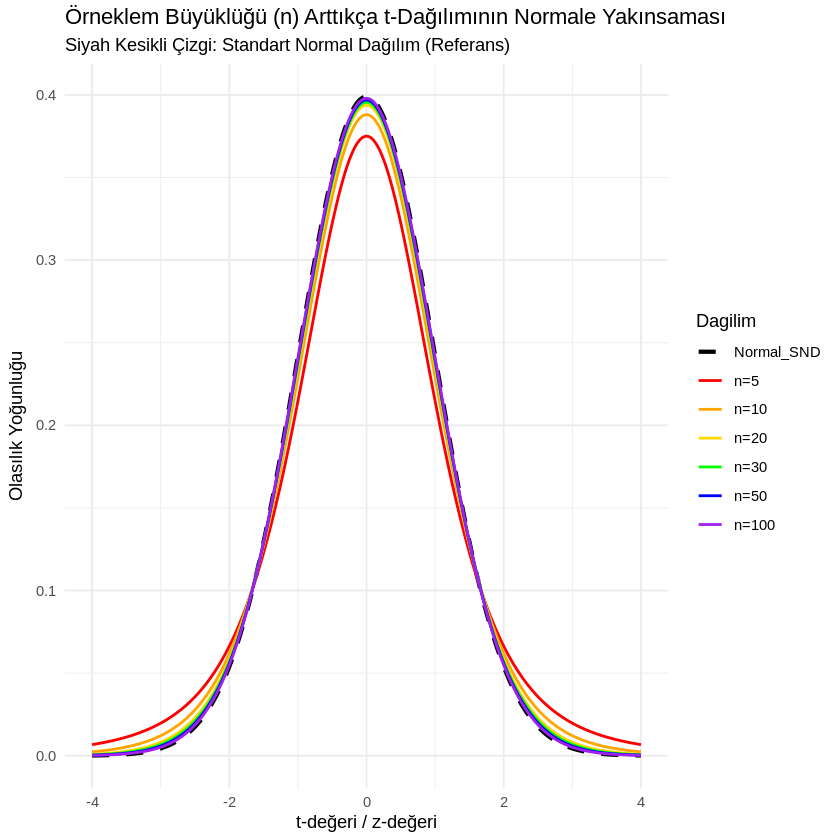

In [18]:
# --- ÖDEV 3: t-DAĞILIMININ NORMALE YAKINSAMASI ---

library(ggplot2)
install.packages("reshape2")
library(reshape2) # Veriyi şekillendirmek için

# 1. X Ekseni (Değer Aralığı)
x_degerleri <- seq(-4, 4, length.out = 1000)

# 2. Veri Çerçevesi (Data Frame) Oluşturma
df_plot <- data.frame(x = x_degerleri)

# Referans: Standart Normal Dağılım (SND)
df_plot$Normal_SND <- dnorm(x_degerleri, mean = 0, sd = 1)

# 3. Farklı n Değerleri İçin t-Dağılımları
n_listesi <- c(5, 10, 20, 30, 50, 100)

for(n in n_listesi){
  col_name <- paste0("n=", n)
  df_plot[[col_name]] <- dt(x_degerleri, df = n - 1)
}

# 4. Veriyi 'Melt' Etme (Uzun Formata Çevirme)
df_uzun <- melt(df_plot, id.vars = "x", variable.name = "Dagilim", value.name = "Yogunluk")

# 5. GRAFİK ÇİZİMİ (DÜZELTİLDİ: size yerine linewidth kullanıldı)
ggplot(df_uzun, aes(x = x, y = Yogunluk, color = Dagilim, linetype = Dagilim, linewidth = Dagilim)) +
  geom_line() +

  # Renk Ayarları
  scale_color_manual(values = c("black", "red", "orange", "gold", "green", "blue", "purple")) +

  # Çizgi Tipi Ayarları (Siyah olan kesikli, diğerleri düz)
  scale_linetype_manual(values = c("dashed", "solid", "solid", "solid", "solid", "solid", "solid")) +

  # Çizgi Kalınlığı Ayarları (size yerine LINEWIDTH geldi)
  # Normal dağılımı (ilk değer) biraz daha kalın (1.2), diğerlerini ince (0.8) yapıyoruz
  scale_linewidth_manual(values = c(1.2, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8)) +

  # Başlıklar
  labs(title = "Örneklem Büyüklüğü (n) Arttıkça t-Dağılımının Normale Yakınsaması",
       subtitle = "Siyah Kesikli Çizgi: Standart Normal Dağılım (Referans)",
       x = "t-değeri / z-değeri",
       y = "Olasılık Yoğunluğu") +

  theme_minimal() +
  theme(legend.position = "right")